<a href="https://colab.research.google.com/github/sprawesh/IME692Fall2022/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/bank2.txt'
data = np.loadtxt(path)


In [ ]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [ ]:
np.set_printoptions(precision = 3)
print("components: ")
print(pca.components_)
print("variance explained: ")
print(pca.explained_variance_ratio_)

components: 
[[-0.044  0.112  0.139  0.768  0.202 -0.579]
 [-0.011 -0.071 -0.066  0.563 -0.659  0.489]]
variance explained: 
[0.668 0.208]


In [ ]:
from os import sep
#printing a sample of 130 hand written 3s
path = '/content/gdrive/MyDrive/Colab Notebooks/train3.csv'
data = np.genfromtxt(path, delimiter=',')
w = 20  # pixels for one digit
result = np.ones(shape=(4+w*10, 4+w*13))



In [ ]:
np.ones(shape=(4+w*10, 4+w*13))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

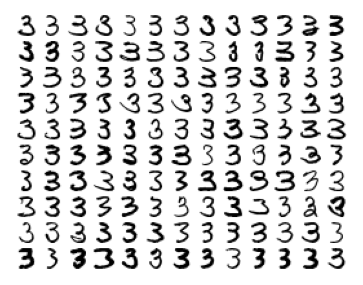

In [ ]:
from matplotlib import transforms, pyplot as plt
%matplotlib inline
# define plots common properties and color constants
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY1, GRAY4, GRAY7 = '#231F20', '#646369', '#929497'

rnd = np.arange(130)
for n in rnd:
  i, j = n // 13, n % 13
  result[i*w+4:i*w+20, j*w+4:j*w+20] = -data[n].reshape((16, 16))
fig, ax = plt.subplots(figsize=(4, 3.3), dpi=110)
ax.imshow(result, cmap="gray")
#ax.set_aspect('equal', 'datalim')
ax.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
for spine in ax.spines.values():
    spine.set_visible(False)

In [ ]:
#first two principal components, and apply dimensionality reduction on data matrix X
data_pca = PCA(n_components=2).fit_transform(data)
X_grid = np.percentile(data_pca[:,0], [5, 25, 50, 75, 95])
Y_grid = np.percentile(data_pca[:,1], [5, 25, 50, 75, 95]) 
X_grid[2], Y_grid[2] = 0, 0


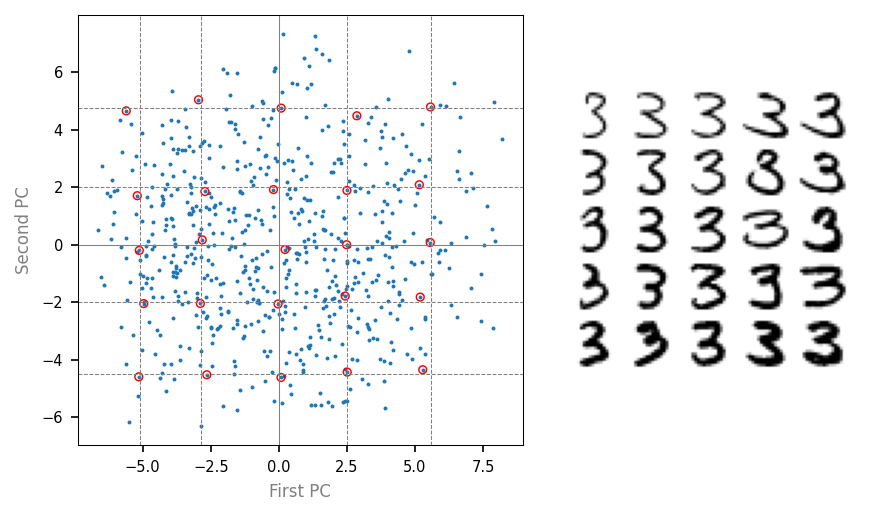

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize = (6.7, 3.8), dpi = 150, gridspec_kw=dict(width_ratios=[3,2]))
plt.subplots_adjust(wspace=0.1)
for s in axarr[1].spines.values():
  s.set_visible(False)

axarr[1].tick_params(bottom = False, left = False, labelbottom = False, labelleft = False)
ax = axarr[0]
ax.scatter(data_pca[:,0], data_pca[:,1], s=0.8, )
ax.set_xlabel("First PC", fontsize=8, color = 'gray')
ax.set_ylabel("Second PC", fontsize=8, color = 'gray')
for i in ax.get_yticklabels() + ax.get_xticklabels():
  i.set_fontsize(7)
ax.axhline(0, linewidth = 0.5, color = 'gray')
ax.axvline(0, linewidth = 0.5, color = 'gray')
for i in range(5):
  if i != 2:
    ax.axhline(Y_grid[i], linewidth = 0.5, color = 'gray', linestyle = '--')
    ax.axvline(X_grid[i], linewidth = 0.5, color = 'gray', linestyle = '--')

img3 = np.ones(shape=(4+w*5, 4+w*5))
for i in range(5):
  for j in range(5):
     v = data_pca - np.array([X_grid[i], Y_grid[j]])      
     v = np.sqrt(np.sum(v**2, axis = -1))       
     idx = np.argmin(v) #got the min index         
     ax.scatter(data_pca[idx:idx+1, 0], data_pca[idx:idx+1, 1], s = 14, facecolors = 'none', edgecolors = 'r', linewidth = 0.7)
     img3[j*w+4:j*w+20, i*w+4:i*w+20] = -data[idx].reshape((16, 16))

ax = axarr[1]
ax.imshow(img3, cmap = 'gray')
ax.set_aspect('equal', 'datalim')
#cricled points indicate those images close to grid vertices
#Right: images corresponding to the circled points
#we can visualize the nature of PCs
#horizontal movement corresponds to lengthening of the lower tail
#vertical movement accounts for character thickness   
